# 상위권 20개국 <-> 한국과의 비교
##  📍**1. GDP가 상승하면 행복지수가 상승할 것이다.**
##  📍**2. 한국의 행복지수는 상위 20개국 평균보다 낮을 것이다.**

## [Top20] 1. 데이터 로드

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LikeLion/Mid-Project/WHR_2018_2022.csv")
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
751,Botswana,Sub-Saharan Africa,3.471,1.503,0.815,0.280,0.571,0.012,0.102,2022
752,Rwanda,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544,2022
753,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105,2022
754,Lebanon,Middle East and North Africa,2.955,1.392,0.498,0.631,0.103,0.082,0.034,2022


In [ ]:
df.groupby("year").size()

,0
year,
2018,153
2019,156
2020,153
2021,149
2022,145


## [Top20] 2. 전체 상관 행렬

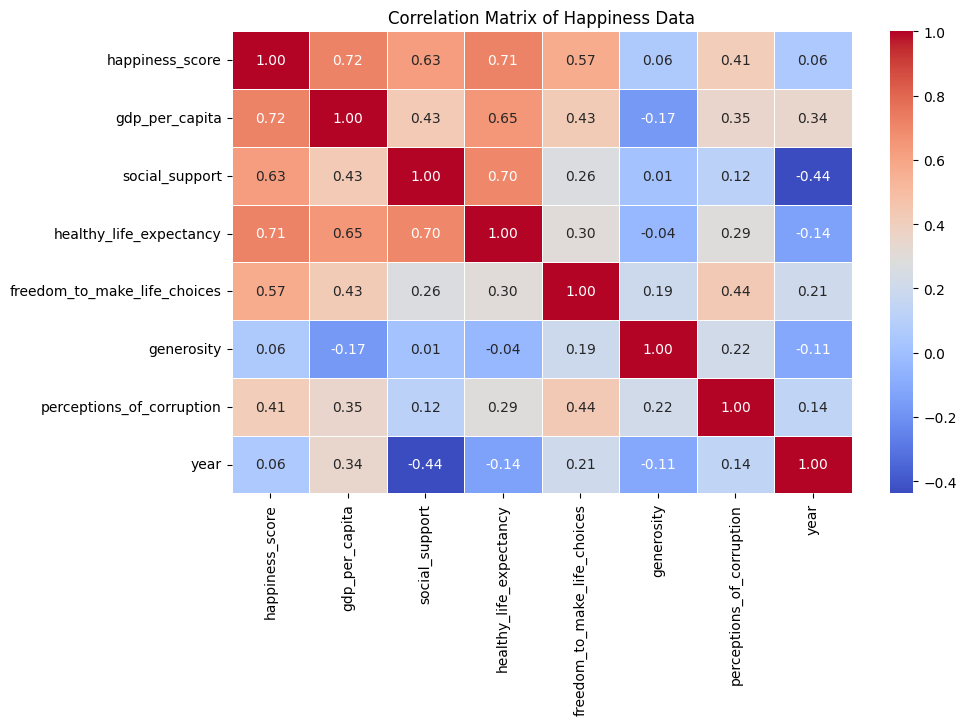

In [ ]:
# 수치형 변수만 선택하여 상관 행렬 계산
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Happiness Data")
plt.show()


## Output
**📍1. GDP가 상승하면 행복지수가 상승할 것이다.** <br>
**-> 상관 행렬 분석 결과 GDP가 행복지수와 가장 높은 양의 상관 관계를 보임.**

## [Top20] 3. 행복 지수를 기준으로 상관 행렬




<ipython-input-5-006a8e5f8434>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=happiness_correlation.values, y=happiness_correlation.index, palette="coolwarm")


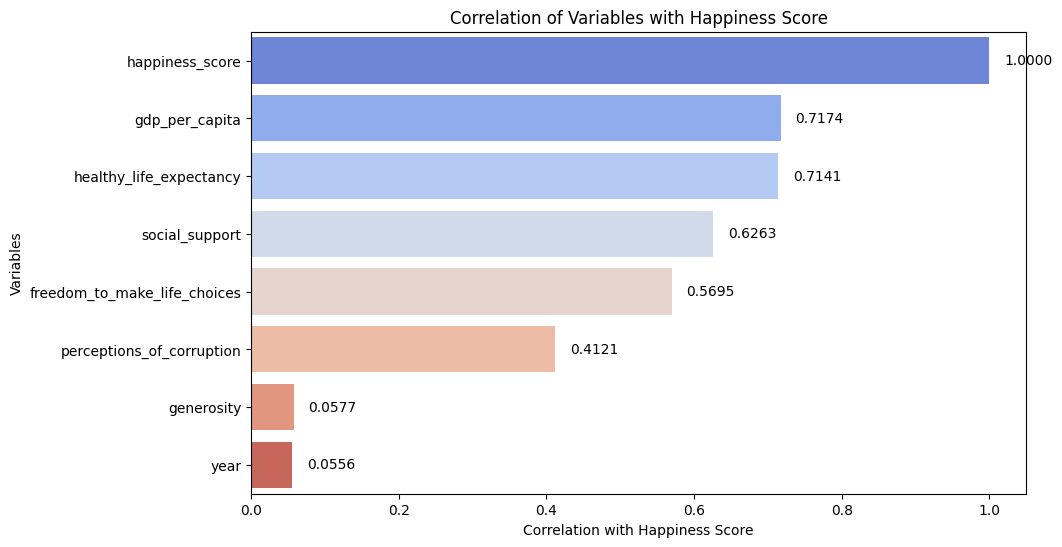

In [ ]:
# 행복 지수를 기준으로 한 상관계수 정렬
happiness_correlation = correlation_matrix["happiness_score"].sort_values(ascending=False)

# 행복 지수를 기준으로 한 상관계수 출력
happiness_correlation

# 행복 지수를 기준으로 한 상관계수 시각화 (막대 그래프)
plt.figure(figsize=(10,6))

ax = sns.barplot(x=happiness_correlation.values, y=happiness_correlation.index, palette="coolwarm")

for index, value in enumerate(happiness_correlation.values):
    ax.text(value + 0.02, index, f"{value:.4f}", va='center')

plt.xlabel("Correlation with Happiness Score")
plt.ylabel("Variables")
plt.title("Correlation of Variables with Happiness Score")
plt.show()

## [Top20] 4. 상위 20개 나라 추출, 연도별 행복지수 변화

In [ ]:
# 5년 평균 데이터 계산 (국가별 평균)
df_avg = df.groupby('country').mean(numeric_only=True).reset_index()

In [ ]:
# 평균 행복지수 계산
top_20_countries = (
    df.groupby("country")["happiness_score"]
    .mean()
    .nlargest(20)
    .index.tolist()
)

# 상위 20개국 필터링
top_20_df = df[df["country"].isin(top_20_countries)]

In [ ]:
# 데이터프레임에서 수치형 변수만 추출하는 코드
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# year 열을 제외한 수치형 변수만 선택
variables = [col for col in numeric_columns if col != "year"]

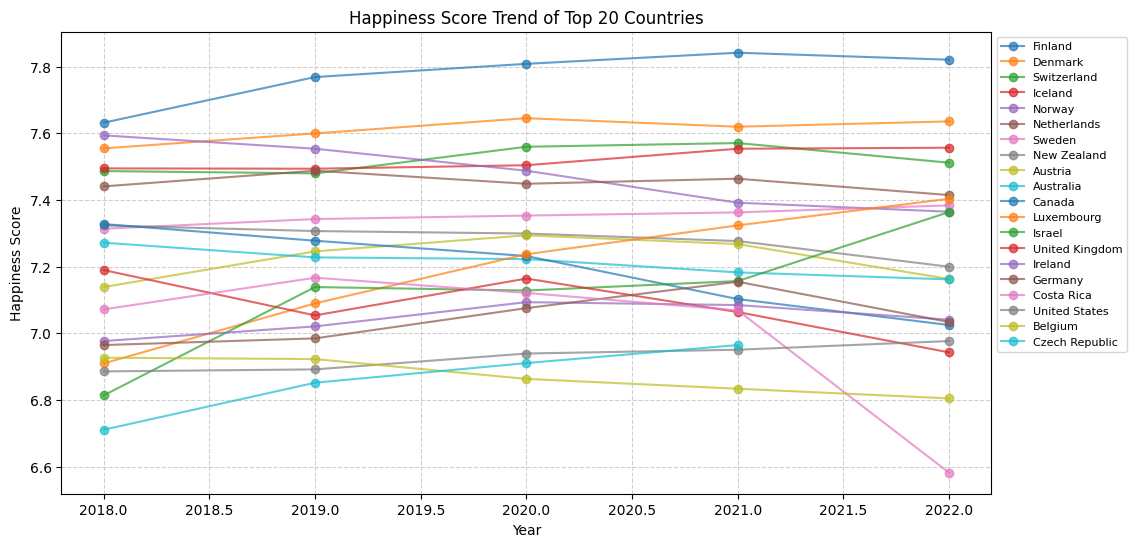

In [ ]:
# 정적 시계열 그래프 생성 (인터랙티브 X)
plt.figure(figsize=(12, 6))

# 상위 20개국의 연도별 행복지수 변화 그래프
for country in top_20_countries:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["happiness_score"], marker="o", linestyle="-", label=country, alpha=0.7)

# 그래프 설정
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Trend of Top 20 Countries")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)

# 그래프 저장
plt.show()


## [Top20] 5. 상위 20개 나라 연도별 행복지수 변화 중 가장 큰 변화를 보이는 데이터 파악

In [ ]:
# 상위 20개국 중 연도별 행복지수 변화량 계산
df_top20_pivot = df[df["country"].isin(top_20_countries)].pivot(index="country", columns="year", values="happiness_score")

# 각 연도별 변화량 계산 (전년 대비 차이)
df_top20_pivot_diff = df_top20_pivot.diff(axis=1)

# 가장 큰 증가와 감소를 보인 국가 및 연도 찾기
max_increase = df_top20_pivot_diff.stack().idxmax()
max_decrease = df_top20_pivot_diff.stack().idxmin()

# 해당 국가의 변화량 확인
increase_value = df_top20_pivot_diff.loc[max_increase]
decrease_value = df_top20_pivot_diff.loc[max_decrease]

# 결과 데이터프레임 생성
change_analysis_top20 = pd.DataFrame({
    "Country": [max_increase[0], max_decrease[0]],
    "Year": [max_increase[1], max_decrease[1]],
    "Happiness Score Change": [increase_value, decrease_value],
    "Trend": ["Increase", "Decrease"]
})
df_top20_pivot_diff
change_analysis_top20

,Country,Year,Happiness Score Change,Trend
0,Israel,2019,0.325,Increase
1,Costa Rica,2022,-0.487,Decrease


## Output
1. 행복지수가 가장 증가한 국가 : 이스라엘 (2019)
-> 행복지수가 상승한 이유는? 경제 성장, 정부 정책이 영향을 미쳤을 가능성이 있다.

2. 행복지수가 가장 하락한 국가 : 코스타리카 (2022)
-> 행복지수가 하락한 이유는 ? COVID 19 이후의 경제적 어려움, 생활 만족도의 하락이 원인일 가능성이 있다.

## [Top20] 5-1. 이스라엘의 변수 변화 (2018~2019)
- 상승한 이유를 파악하기 위해

In [ ]:
# 연도 및 국가 필터링을 통한 데이터 추출
israel_2018 = df[(df["country"] == "Israel") & (df["year"] == 2018)].iloc[0]
israel_2019 = df[(df["country"] == "Israel") & (df["year"] == 2019)].iloc[0]

costa_rica_2021 = df[(df["country"] == "Costa Rica") & (df["year"] == 2021)].iloc[0]
costa_rica_2022 = df[(df["country"] == "Costa Rica") & (df["year"] == 2022)].iloc[0]

In [ ]:
# 이스라엘 (2018-2019) 변화 분석
israel_2018 = df[(df["country"] == "Israel") & (df["year"] == 2018)].iloc[0]
israel_2019 = df[(df["country"] == "Israel") & (df["year"] == 2019)].iloc[0]

change_israel = israel_2019[variables] - israel_2018[variables]

# 이스라엘 데이터프레임 생성
change_analysis_israel = pd.DataFrame({
    "Variable": variables,
    "Israel (2018)": israel_2018[variables].values,
    "Israel (2019)": israel_2019[variables].values,
    "Change (2019-2018)": change_israel.values
})
change_analysis_israel

,Variable,Israel (2018),Israel (2019),Change (2019-2018)
0,happiness_score,6.814,7.139,0.325
1,gdp_per_capita,1.301,1.276,-0.025
2,social_support,1.559,1.455,-0.104
3,healthy_life_expectancy,0.883,1.029,0.146
4,freedom_to_make_life_choices,0.533,0.371,-0.162
5,generosity,0.354,0.261,-0.093
6,perceptions_of_corruption,0.272,0.082,-0.19


<ipython-input-13-7abde807c4c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variables, y=change_israel.values, ax=ax, palette="Blues")


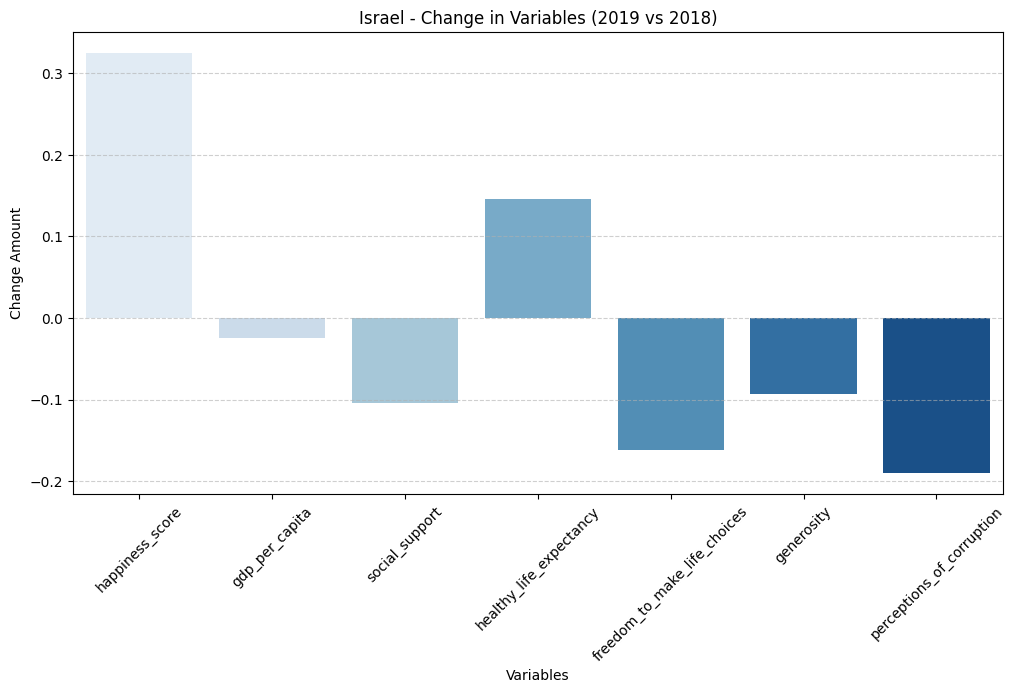

In [ ]:
#변수별 변화량 비교
import matplotlib.pyplot as plt
import seaborn as sns

# 이스라엘 변화량 그래프
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=variables, y=change_israel.values, ax=ax, palette="Blues")
ax.set_title("Israel - Change in Variables (2019 vs 2018)")
ax.set_ylabel("Change Amount")
ax.set_xlabel("Variables")
ax.tick_params(axis='x', rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Output
행복 지수가 증가한 상황,

1. 상승한 변수 (긍정적 영향)
- 기대 수명이 증가 (약 0.15) -> 의료 시스템의 개선, 건강 관련 정책이 원인일 수 있다.
- 부패 인식 감소 즉, 정부가 더 투명하게 운영된다고 인식 -> 이로 인한 행복 지수 상승

<br>

2. 하락한 변수
- 사회적 지원, 삶의 자유도, 관대함 -> 사회적 지원은 전체 상관계수를 봤을 때 2위의 변수였으나 **이스라엘의 경우 맞지 않음**

<br>

3. 차이가 크지 않은 변수
- GDP 미미한 변화! -> **가설 1이 맞지 않음**

## [Top20] 5-2. 코스타리카의 변수 변화 (2021~2022)
- 하락한 이유를 파악하기 위해

In [ ]:
# 코스타리카 (2021-2022) 변화 분석
costa_rica_2021 = df[(df["country"] == "Costa Rica") & (df["year"] == 2021)].iloc[0]
costa_rica_2022 = df[(df["country"] == "Costa Rica") & (df["year"] == 2022)].iloc[0]

change_costa_rica = costa_rica_2022[variables] - costa_rica_2021[variables]

# 코스타리카 데이터프레임 생성
change_analysis_costa_rica = pd.DataFrame({
    "Variable": variables,
    "Costa Rica (2021)": costa_rica_2021[variables].values,
    "Costa Rica (2022)": costa_rica_2022[variables].values,
    "Change (2022-2021)": change_costa_rica.values
})
change_analysis_costa_rica

,Variable,Costa Rica (2021),Costa Rica (2022),Change (2022-2021)
0,happiness_score,7.069,6.582,-0.487
1,gdp_per_capita,1.134,1.584,0.45
2,social_support,0.966,1.054,0.088
3,healthy_life_expectancy,0.722,0.744,0.022
4,freedom_to_make_life_choices,0.673,0.661,-0.012
5,generosity,0.105,0.089,-0.016
6,perceptions_of_corruption,0.083,0.102,0.019


<ipython-input-15-2a7bd87cff7f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variables, y=change_costa_rica.values, ax=ax, palette="Reds")


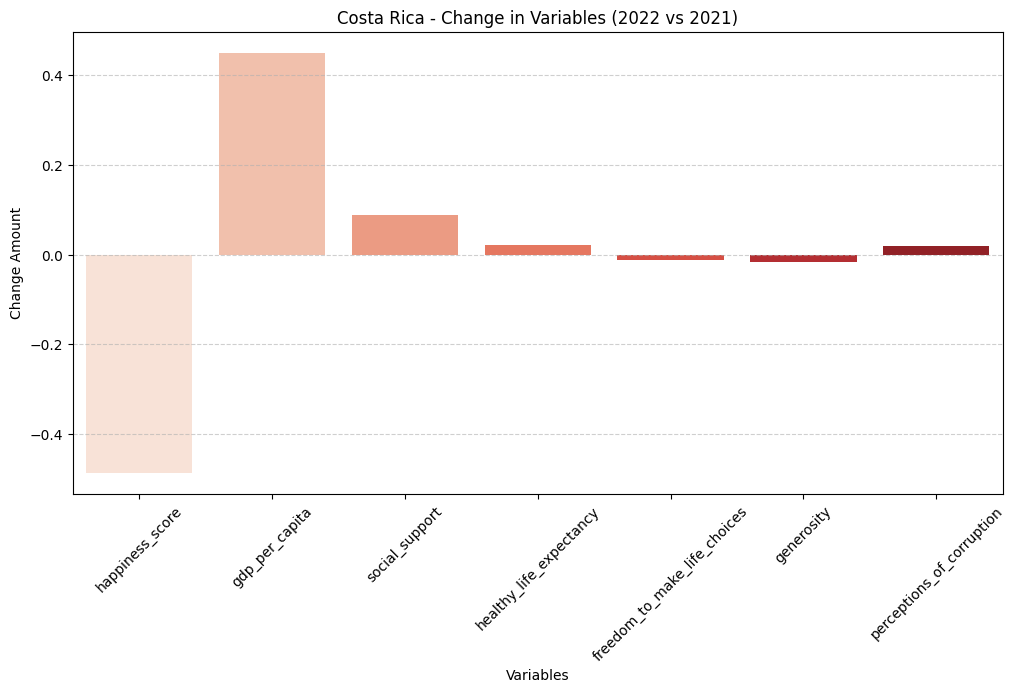

In [ ]:
# 변수별 변화량 비교
import matplotlib.pyplot as plt
import seaborn as sns

# 코스타리카 변화량 그래프
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=variables, y=change_costa_rica.values, ax=ax, palette="Reds")
ax.set_title("Costa Rica - Change in Variables (2022 vs 2021)")
ax.set_ylabel("Change Amount")
ax.set_xlabel("Variables")
ax.tick_params(axis='x', rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Output
행복 지수가 하락한 상황,

1. 하락한 변수
- 부패 인식이 미미하게 상승 -> 국민들이 부패가 증가했다고 인식했다고 판단.
- 자유도 , 관대함이 미미하게 하락 -> 하락한 변수가 없다고 판단.

<br>

2. 증가한 변수
- GDP, 사회적 지원, 기대수명 상승 -> 경제 성장만으로는 국민의 행복도를 유지하는 데 한계가 있음, 비경제적 요인들이 행복 지수 하락의 주요 원인이라고 판단.

<br>

3. 그렇다면
- GDP 증가에도 불구하고 행복 지수가 하락한 이유?
- 사회적 지원 증가에도 불구하고 행복 지수가 하락한 이유?

## [한국] 1. 상위 20개 나라 + 한국 : 행복 지수 비교
- 이스라엘과 코스타리카의 행복지수를 어느정도 파악한 상황에서 한국으로 넘어감.

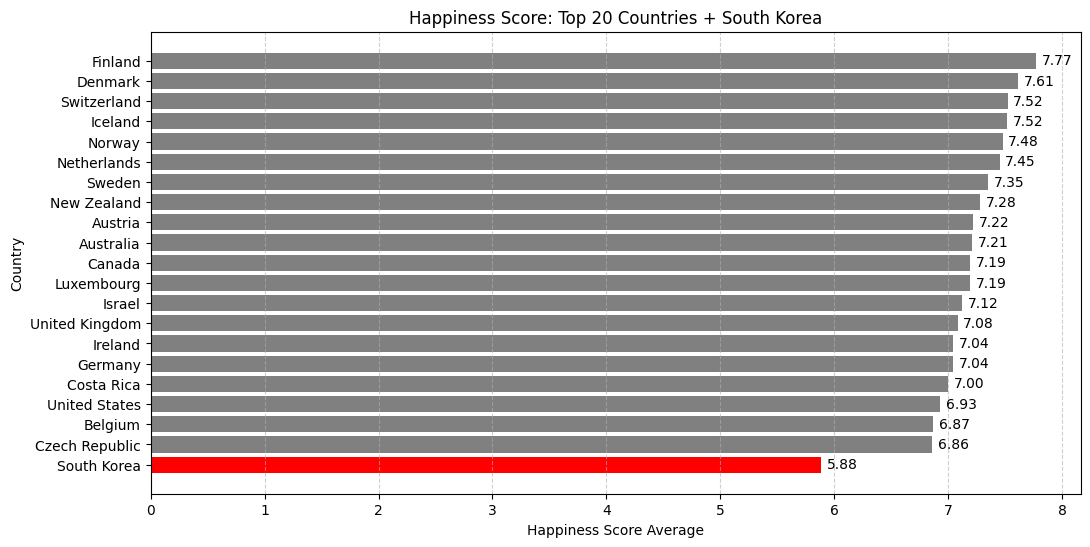

In [ ]:
# 상위 20개국 평균 행복지수
avg_happiness = df[df["country"].isin(top_20_countries)].groupby("country")["happiness_score"].mean()

# 한국의 평균 행복지수
korea_happiness = df[df["country"] == "South Korea"].groupby("country")["happiness_score"].mean()

# 한국과 상위 20개국 데이터 결합
top_20_korea_df = pd.concat([avg_happiness, korea_happiness]).sort_values()

# 국가 리스트
countries = top_20_korea_df.index.tolist()

# 그래프 생성
colors = ["grey" if country != "South Korea" else "red" for country in countries]
plt.figure(figsize=(12, 6))
bars = plt.barh(countries, top_20_korea_df, color=colors)

# 수치 표시
for bar, value in zip(bars, top_20_korea_df):
    plt.text(value + 0.05, bar.get_y() + bar.get_height()/2, f"{value:.2f}", va='center', fontsize=10)

plt.xlabel("Happiness Score Average")
plt.ylabel("Country")
plt.title("Happiness Score: Top 20 Countries + South Korea")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [ ]:
import pandas as pd

# 5년 평균 행복지수 계산 (국가별)
df_avg = df.groupby('country')["happiness_score"].mean().reset_index()

# 행복지수 기준으로 내림차순 정렬 후 순위 매기기
df_avg = df_avg.sort_values(by="happiness_score", ascending=False).reset_index(drop=True)

# 한국(Korea, South)의 순위 확인
korea_rank = df_avg[df_avg["country"] == "South Korea"].index[0] + 1  # 0-based index이므로 +1

print(f"한국의 행복지수 순위: {korea_rank}위 / 전체 {len(df_avg)}개국 중")


한국의 행복지수 순위: 59위 / 전체 157개국 중


## Output
**📍2. 한국의 행복지수는 상위 20개국보다 낮을 것이다.** <br>
**-> 한국의 행복지수가 낮은 것으로 확인.**

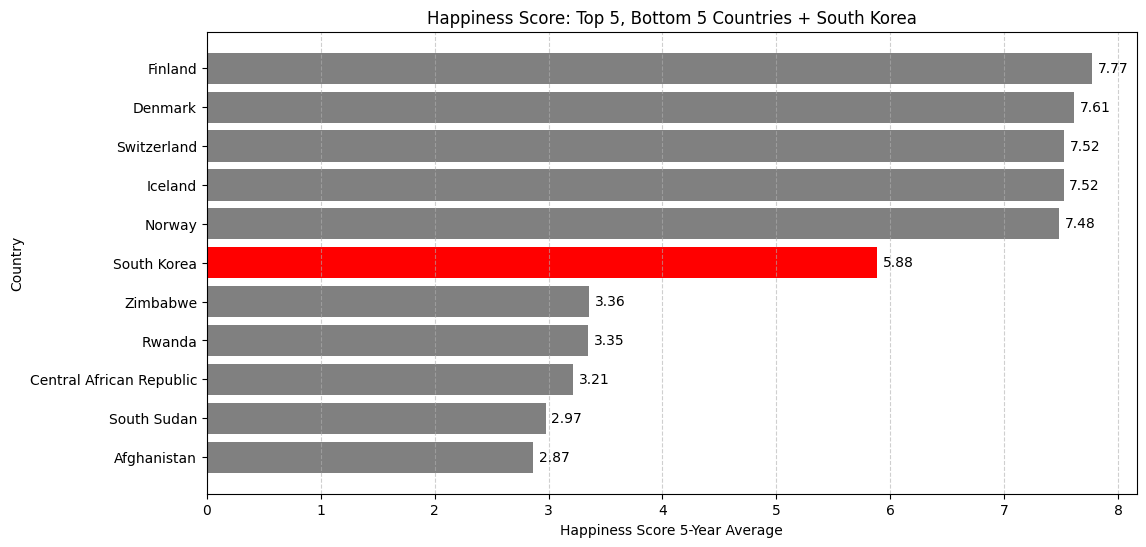

In [ ]:
# 5년 평균 데이터 계산 (국가별 평균)
df_avg = df.groupby('country').mean(numeric_only=True).reset_index()

# 평균 행복지수 기준 정렬
df_avg_sorted = df_avg.sort_values(by="happiness_score", ascending=False)

# 상위 5개국, 하위 5개국, 한국
top_5_avg = df_avg_sorted.head(5)
bottom_5_avg = df_avg_sorted.tail(5)
korea_avg = df_avg_sorted[df_avg_sorted["country"] == "South Korea"]

# 데이터 생성
selected_avg_countries = pd.concat([top_5_avg, bottom_5_avg, korea_avg]).sort_values(by="happiness_score")

# 그래프 생성
plt.figure(figsize=(12, 6))
colors = ["grey" if country != "South Korea" else "red" for country in selected_avg_countries["country"]]
bars = plt.barh(selected_avg_countries["country"], selected_avg_countries["happiness_score"], color=colors)

# 수치 표시
for bar, value in zip(bars, selected_avg_countries["happiness_score"]):
    plt.text(value + 0.05, bar.get_y() + bar.get_height()/2, f"{value:.2f}", va='center', fontsize=10)

plt.xlabel("Happiness Score 5-Year Average")
plt.ylabel("Country")
plt.title("Happiness Score: Top 5, Bottom 5 Countries + South Korea")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


## [한국] 2. 상위 20개 나라 + 한국 : 모든 변수 비교

<Figure size 1200x600 with 0 Axes>

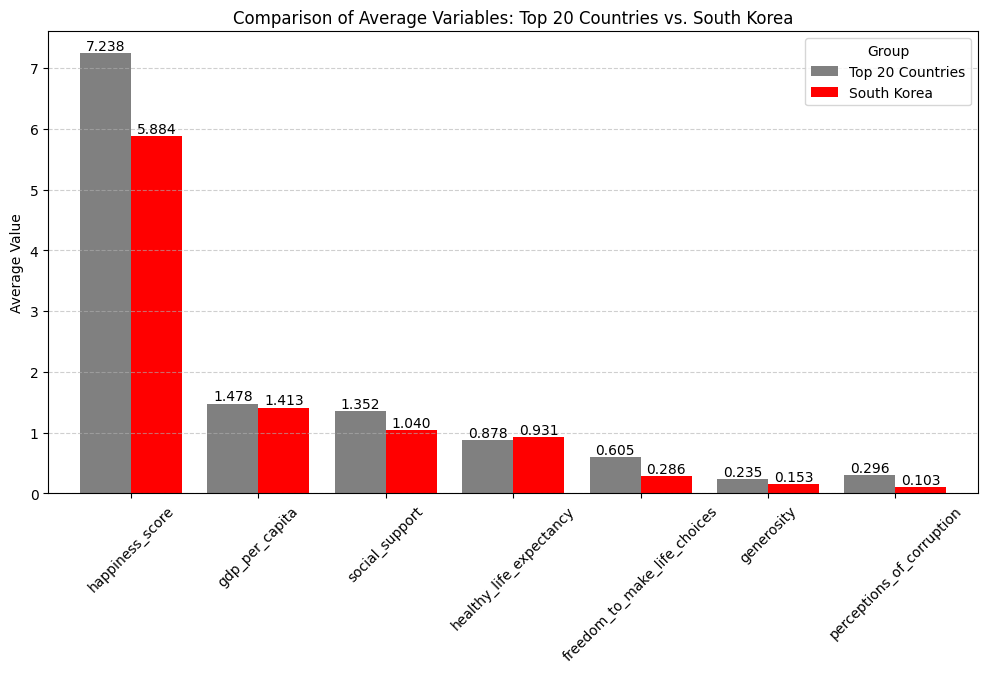

In [ ]:
target_country = "South Korea"

# 상위 20개국 각 변수별 평균값
avg_top_20 = df[df["country"].isin(top_20_countries)].groupby("country")[variables].mean().mean()

# 대한민국 각 변수별 평균값
avg_korea = df[df["country"] == "South Korea"][variables].mean()

# 상위 20개국 평균 vs 특정 국가
comparison_df_target = pd.DataFrame({
    "Top 20 Countries": avg_top_20,
    target_country: avg_korea
})

# 그래프 생성
plt.figure(figsize=(12, 6))
ax = comparison_df_target.plot(kind="bar", figsize=(12, 6), width=0.8, color=["gray", "red"])
plt.title(f"Comparison of Average Variables: Top 20 Countries vs. {target_country}")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Group")

# 수치 표시
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()


## Output
변수의 차이를 봤을 때 (Top20 행복지수 > 한국 행복지수),

- 비슷한 수준 : GDP
- 한국이 더 낮은 변수 : 사회적 지원, 자유도, 관대함, 부패인식
- 한국이 더 높은 변수 : 기대 수명

 <br>
한국의 경우,
- 행복지수는 GDP / 기대수명에 큰 영향을 받지 않고 -> **가설 1에 부합하지 않음**
- 사회적 지원, 자유도 , 관대함, 부패인식이 낮아서 행복지수가 낮다고 판단.

## [한국] 3. 한국 연도별 행복 지수 변화

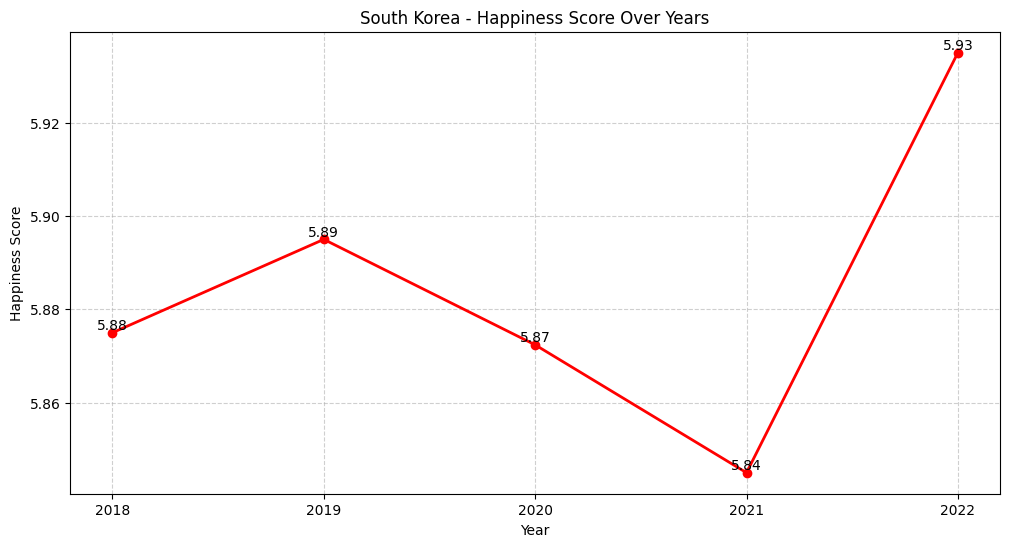

In [ ]:
# 대한민국 연도별 데이터 추출
df_korea_yearly = df[df["country"] == "South Korea"].groupby("year")[variables].mean()

# 행복지수 연도별 변화
plt.figure(figsize=(12, 6))
plt.plot(df_korea_yearly.index, df_korea_yearly["happiness_score"], marker="o", linestyle="-", linewidth=2, color="red")

# 수치 표시
for year, score in zip(df_korea_yearly.index, df_korea_yearly["happiness_score"]):
    plt.text(year, score, f"{score:.2f}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("South Korea - Happiness Score Over Years")
plt.xticks(df_korea_yearly.index.astype(int))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Output

1. 변화 추이
- 2018~2019 : 증가
- 2019~2021 : 점진적 감소 -> COVID 19로 인해 경제적 어려움, 전반적으로 사회 분위기가 안좋아진 것이 원인일 수 있다.
- 2021~2022 : 급격한 증가 -> 이유를 알아보려고 한다!


## [한국] 3-1. 한국 행복 지수 변화 중 가장 큰 변화를 보이는 데이터 파악


In [ ]:
# 대한민국의 2021년과 2022년 주요 변수 값 비교
korea_2021 = df[(df["country"] == "South Korea") & (df["year"] == 2021)].iloc[0]
korea_2022 = df[(df["country"] == "South Korea") & (df["year"] == 2022)].iloc[0]

# 변화량 계산
change_korea = korea_2022[variables] - korea_2021[variables]

# 변화량 데이터프레임 생성
change_analysis_korea = pd.DataFrame({
    "Variable": variables,
    "South Korea (2021)": korea_2021[variables].values,
    "South Korea (2022)": korea_2022[variables].values,
    "Change (2022 - 2021)": change_korea.values
})
change_analysis_korea


,Variable,South Korea (2021),South Korea (2022),Change (2022 - 2021)
0,happiness_score,5.845,5.935,0.09
1,gdp_per_capita,1.403,1.851,0.448
2,social_support,0.758,0.886,0.128
3,healthy_life_expectancy,0.801,0.841,0.04
4,freedom_to_make_life_choices,0.353,0.414,0.061
5,generosity,0.134,0.111,-0.023
6,perceptions_of_corruption,0.135,0.176,0.041


<ipython-input-20-1578e72c4291>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variables, y=change_korea.values, ax=ax, palette="coolwarm")


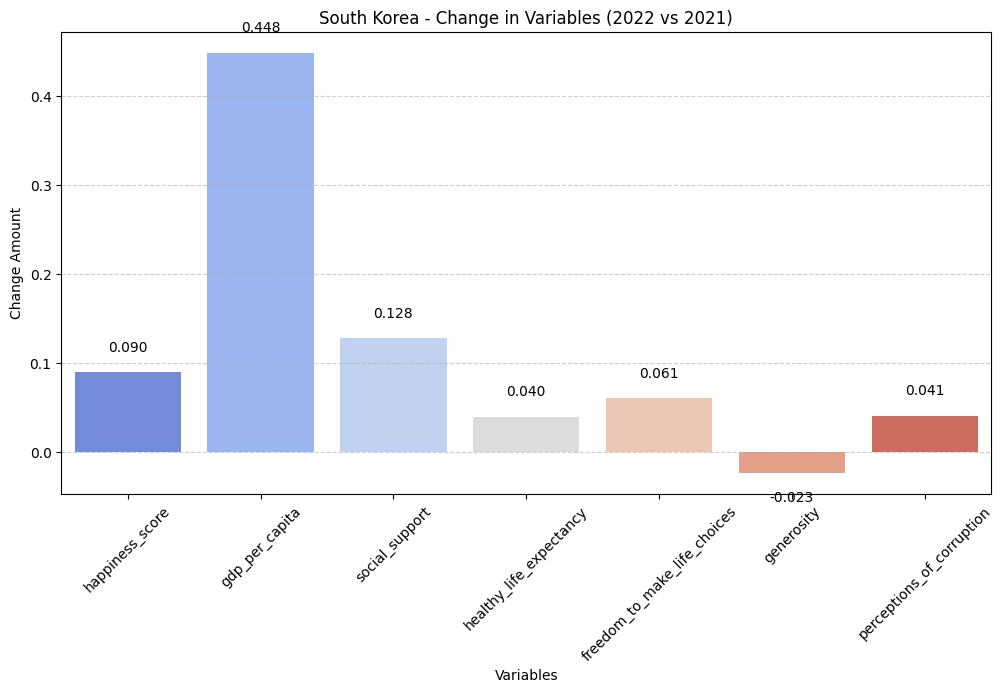

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변화량 그래프
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=variables, y=change_korea.values, ax=ax, palette="coolwarm")

# 수치 추가
for index, value in enumerate(change_korea.values):
    ax.text(index, value + (0.02 if value > 0 else -0.02), f"{value:.3f}", ha='center', va='bottom' if value > 0 else 'top', fontsize=10, color="black")

ax.set_title("South Korea - Change in Variables (2022 vs 2021)")
ax.set_ylabel("Change Amount")
ax.set_xlabel("Variables")
ax.tick_params(axis='x', rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Output
행복 지수가 증가한 상황,

<br>

1. 상승한 변수 (긍정적 영향)
- GDP 상승 -> COVID19 제한 이후 내수 경제 활성화가 원인일 것이라고 판단.

- 사회적 지원, 기대 수명, 부패 인식 상승 -> COVID19 이후 전염병에 대한 대처가 수월해진 것, 정부의 건강 복지의 지원이 증가한 것이 원인이라고 판단.

- 자유도 상승 -> COVID19 이후 행동 제한이 사라진것이 원인이라고 판단.

<br>

2. 하락한 변수
- 관대함 감소 -> 전염병 이후로 감염등의 이유로 예민함이 상승한것이 원인이라고 판단.


## [한국] 4. 한국 + 행복지수가 유사한 10개 나라 : GDP 비교

In [ ]:
import pandas as pd

# 5년 평균 행복 지수 계산
df_avg = df.groupby("country").mean(numeric_only=True).reset_index()

# 행복 지수를 기준으로 정렬
df_avg1 = df_avg.drop(columns=['year']).reset_index()
df_sorted = df_avg1.sort_values("happiness_score")


# 한국의 인덱스
korea_index = df_sorted[df_sorted["country"] == "South Korea"].index[0]

# 위, 아래 5개 국가 선택
start_idx = max(korea_index - 5, 0)
end_idx = min(korea_index + 5, len(df_sorted))

# 한국+근접국 데이터 생성
similar_countries = df_sorted.iloc[start_idx:end_idx].sort_values("happiness_score", ascending=False)
similar_countries

,index,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
119,119,Saudi Arabia,6.43390,1.484266,1.210790,0.667164,0.550095,0.086688,0.153064
130,130,Spain,6.40638,1.390107,1.342220,0.942469,0.440797,0.139261,0.107116
150,150,Uruguay,6.40342,1.213400,1.314216,0.767986,0.606453,0.124029,0.197285
90,90,Mexico,6.39860,1.162077,1.103467,0.742120,0.534379,0.082019,0.091027
51,51,Guatemala,6.38278,0.890763,1.066453,0.620191,0.610429,0.159922,0.093472
115,115,Qatar,6.37400,1.666500,1.308000,0.809500,0.604500,0.238000,0.169000
123,123,Singapore,6.36782,1.692916,1.291091,1.006963,0.631663,0.217954,0.515432
8,8,Bahrain,6.36506,1.451938,1.195465,0.738967,0.618880,0.246091,0.130739
17,17,Brazil,6.34352,1.086536,1.252893,0.685824,0.485259,0.122735,0.106304
64,64,Italy,6.31208,1.404279,1.265659,0.921301,0.324861,0.136653,0.040829


In [ ]:
# 한국 데이터 추출
korea_data = df_sorted[df_sorted["country"] == "South Korea"]

# 한국 데이터를 기존 similar_countries 데이터에 추가
updated_similar_countries = pd.concat([similar_countries, korea_data]).sort_values("happiness_score", ascending=False)
updated_similar_countries

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
119,Saudi Arabia,6.43390,1.484266,1.210790,0.667164,0.550095,0.086688,0.153064
130,Spain,6.40638,1.390107,1.342220,0.942469,0.440797,0.139261,0.107116
150,Uruguay,6.40342,1.213400,1.314216,0.767986,0.606453,0.124029,0.197285
90,Mexico,6.39860,1.162077,1.103467,0.742120,0.534379,0.082019,0.091027
51,Guatemala,6.38278,0.890763,1.066453,0.620191,0.610429,0.159922,0.093472
115,Qatar,6.37400,1.666500,1.308000,0.809500,0.604500,0.238000,0.169000
123,Singapore,6.36782,1.692916,1.291091,1.006963,0.631663,0.217954,0.515432
8,Bahrain,6.36506,1.451938,1.195465,0.738967,0.618880,0.246091,0.130739
17,Brazil,6.34352,1.086536,1.252893,0.685824,0.485259,0.122735,0.106304
64,Italy,6.31208,1.404279,1.265659,0.921301,0.324861,0.136653,0.040829


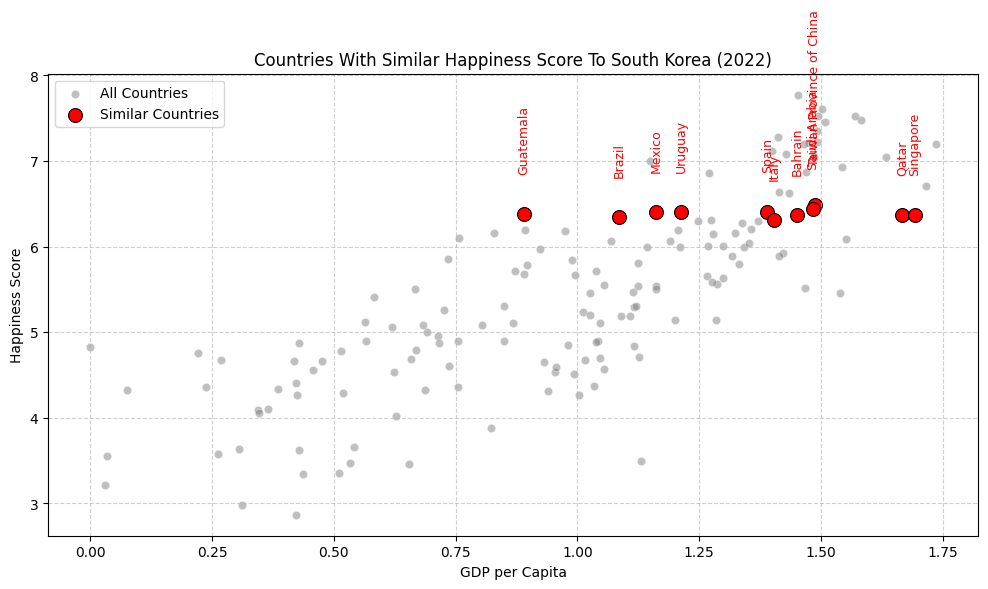

In [ ]:
# 한국+근접국가 산점도
plt.figure(figsize=(12, 6))

# 전체 국가 표시 (회색)
sns.scatterplot(data=df_avg1, x="gdp_per_capita", y="happiness_score", color="gray", alpha=0.5, label="All Countries")

# 한국+근접국가 강조 (빨간색)
sns.scatterplot(data=similar_countries, x="gdp_per_capita", y="happiness_score", color="red", s=100, label="Similar Countries", edgecolor="black")

# 라벨 표시
for _, row in similar_countries.iterrows():
    plt.text(row["gdp_per_capita"], row["happiness_score"] + 0.5, row["country"], fontsize=9, ha="center", color="red", rotation=90)

# 그래프 생성
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Countries With Similar Happiness Score To South Korea (2022)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Output

 1. 한국+근접10개국 중에서 GDP가 제일 높다. -> GDP와 행복지수가 정비례하지 않음.

 2. 그렇다면,
 - 근접국가들의 GDP 제외 다른 변수들은 어떨까?




## [한국] 5. 한국 + 행복지수가 유사한 10개 나라 : 모든 변수 비교

<Figure size 1200x600 with 0 Axes>

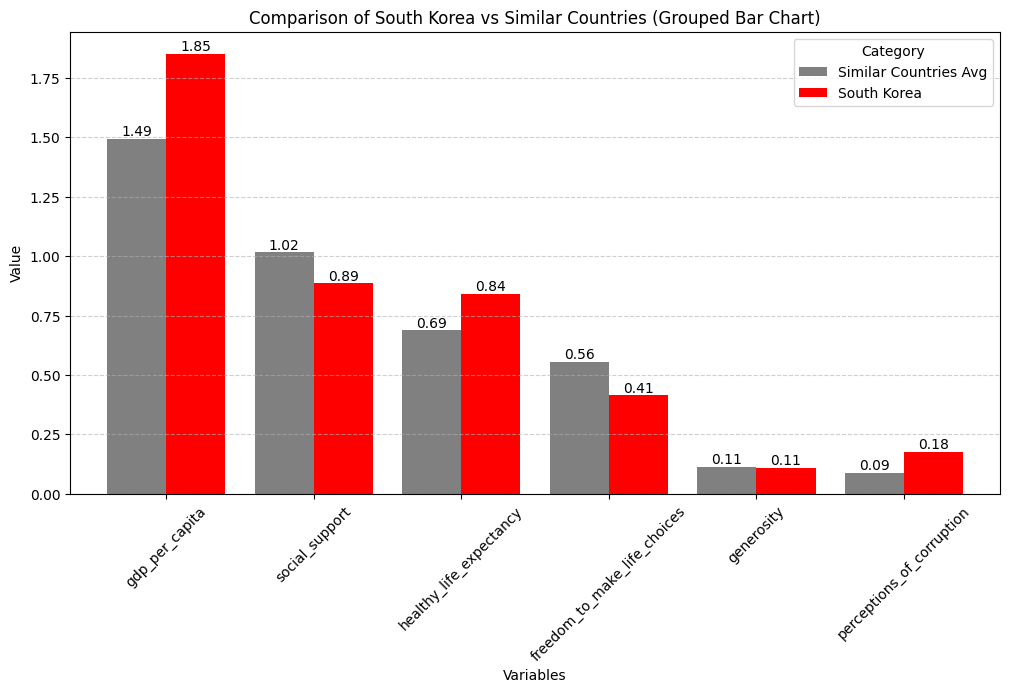

In [ ]:
# 한국+근접국 모든 변수 비교
plt.figure(figsize=(12, 6))

# 변수 선택
selected_variables = ["gdp_per_capita", "social_support", "healthy_life_expectancy",
                      "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption"]

# 한국 + 근접국 평균
grouped_data = pd.DataFrame({
     "Similar Countries Avg": similar_countries[selected_variables].mean().values.flatten(),
    "South Korea": df_avg1[df_avg1["country"] == "South Korea"][selected_variables].values.flatten()
}, index=selected_variables)

ax = grouped_data.plot(kind="bar", figsize=(12, 6), width=0.8, color=["grey", "red"])

# 수치 표시
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10)


# 그래프 그리기
plt.xticks(rotation=45)
plt.xlabel("Variables")
plt.ylabel("Value")
plt.title("Comparison of South Korea vs Similar Countries (Grouped Bar Chart)")
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


## Output

1. 근접국보다 높은 변수 (긍정적)
- 기대 수명 -> 의료 시스템, 건강 인프라 등의 의료 수준이 높은 편이라고 판단.

<br>

2. 근접국보다 낮은 변수 (부정적)
- 사회적 지원, 자유도, 부패 인식(부패 인식이 높아 정부를 신뢰하지 않음) -> 이 변수들이 높이는 정책을 피는것이 한국이 나아갈 방향!

https://data-explorer.oecd.org/vis?lc=en&pg=0&snb=1&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HW%40DF_AVG_ANN_HRS_WKD&df[ag]=OECD.ELS.SAE&df[vs]=&pd=2018%2C2022&dq=........_T....&to[TIME_PERIOD]=false


In [ ]:
import pandas as pd

# 파일 경로
file_path = "/content/drive/MyDrive/LikeLion/Mid-Project/OECD_Working_Hours_Annually(2018~2022).csv"

# OECD 근무시간 데이터 로드
oecd_working_hours = pd.read_csv(file_path)

# 데이터 구조 확인
oecd_working_hours.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.SAE:DSD_HW@DF_AVG_ANN_HRS_WKD(1.0),Average annual hours actually worked per worker,I,GRC,Greece,HW,Hours worked,H_Y_PS,Hours per year per person,...,2018,NaN,1961.0,NaN,A,Normal value,0,Units,0.0,Zero
1,DATAFLOW,OECD.ELS.SAE:DSD_HW@DF_AVG_ANN_HRS_WKD(1.0),Average annual hours actually worked per worker,I,AUS,Australia,HW,Hours worked,H_Y_PS,Hours per year per person,...,2018,NaN,1654.0,NaN,A,Normal value,0,Units,0.0,Zero
2,DATAFLOW,OECD.ELS.SAE:DSD_HW@DF_AVG_ANN_HRS_WKD(1.0),Average annual hours actually worked per worker,I,AUS,Australia,HW,Hours worked,H_Y_PS,Hours per year per person,...,2022,NaN,1628.0,NaN,A,Normal value,0,Units,0.0,Zero
3,DATAFLOW,OECD.ELS.SAE:DSD_HW@DF_AVG_ANN_HRS_WKD(1.0),Average annual hours actually worked per worker,I,AUS,Australia,HW,Hours worked,H_Y_PS,Hours per year per person,...,2021,NaN,1622.0,NaN,A,Normal value,0,Units,0.0,Zero
4,DATAFLOW,OECD.ELS.SAE:DSD_HW@DF_AVG_ANN_HRS_WKD(1.0),Average annual hours actually worked per worker,I,SWE,Sweden,HW,Hours worked,H_Y_PS,Hours per year per person,...,2022,NaN,1440.0,NaN,A,Normal value,0,Units,0.0,Zero


In [ ]:
# 필요한 컬럼만 선택 & 컬럼명 변경
oecd_working_hours_cleaned = oecd_working_hours[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].copy()
oecd_working_hours_cleaned.columns = ["country", "year", "working_hours"]

# 기존 데이터(df)와 병합 (국가 & 연도를 기준으로)
df_working_hours = df.merge(oecd_working_hours_cleaned, on=["country", "year"], how="left")
df_working_hours

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,working_hours
0,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,1537.0
1,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,1514.0
2,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,1528.0
3,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,1530.0
4,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,1547.0
...,...,...,...,...,...,...,...,...,...,...,...
1589,Botswana,Sub-Saharan Africa,3.471,1.503,0.815,0.280,0.571,0.012,0.102,2022,NaN
1590,Rwanda,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544,2022,NaN
1591,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105,2022,NaN
1592,Lebanon,Middle East and North Africa,2.955,1.392,0.498,0.631,0.103,0.082,0.034,2022,NaN


## [근무시간] 2. 상관행렬


In [ ]:
# 전체 수치형 변수의 상관행렬 계산
correlation_matrix_full = df_working_hours.select_dtypes(include=['number']).corr()
correlation_matrix_full

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,working_hours
happiness_score,1.000000,0.717369,0.626345,0.714132,0.569519,0.057687,0.412123,0.055571,-0.500311
gdp_per_capita,0.717369,1.000000,0.431833,0.650673,0.425357,-0.168549,0.353681,0.342783,-0.402994
social_support,0.626345,0.431833,1.000000,0.700506,0.264298,0.011667,0.116638,-0.438050,-0.280137
healthy_life_expectancy,0.714132,0.650673,0.700506,1.000000,0.298318,-0.038573,0.287817,-0.139954,-0.275554
freedom_to_make_life_choices,0.569519,0.425357,0.264298,0.298318,1.000000,0.193816,0.438021,0.205409,-0.308058
generosity,0.057687,-0.168549,0.011667,-0.038573,0.193816,1.000000,0.215816,-0.109386,-0.335395
perceptions_of_corruption,0.412123,0.353681,0.116638,0.287817,0.438021,0.215816,1.000000,0.139861,-0.572734
year,0.055571,0.342783,-0.438050,-0.139954,0.205409,-0.109386,0.139861,1.000000,-0.068067
working_hours,-0.500311,-0.402994,-0.280137,-0.275554,-0.308058,-0.335395,-0.572734,-0.068067,1.000000


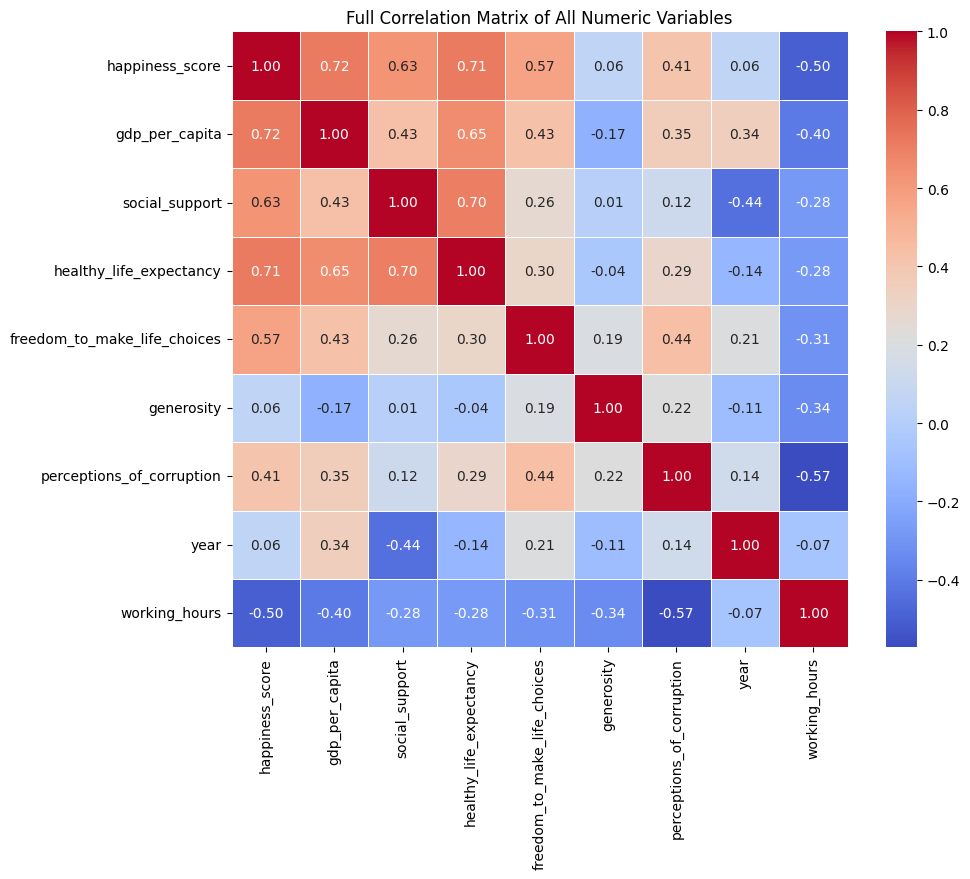

In [ ]:
#전체 상관행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_full, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Full Correlation Matrix of All Numeric Variables")
plt.show()

#### 근무시간 vs 행복지수 관계 분석 (산점도 & 상관계수)

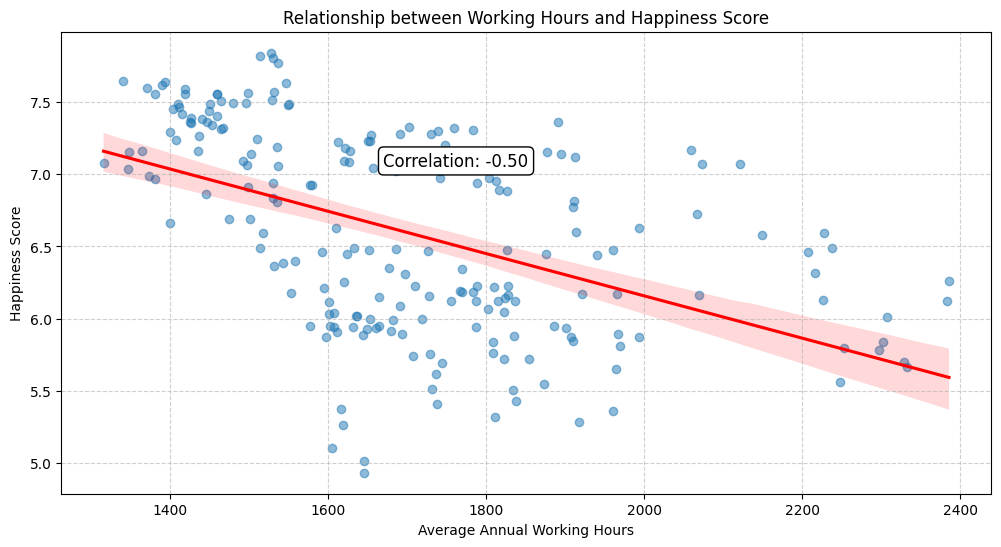

In [ ]:
# 근무시간과 행복지수의 상관계수 계산
correlation_value = df_working_hours[["working_hours", "happiness_score"]].corr().iloc[0, 1]

# 시각화: 근무시간 vs 행복지수 관계 (상관계수 포함)
plt.figure(figsize=(12, 6))
sns.regplot(x=df_working_hours["working_hours"], y=df_working_hours["happiness_score"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Average Annual Working Hours")
plt.ylabel("Happiness Score")
plt.title("Relationship between Working Hours and Happiness Score")

# 상관계수 값을 그래프에 추가
plt.text(x=df_working_hours["working_hours"].max() * 0.7,
         y=df_working_hours["happiness_score"].max() * 0.9,
         s=f"Correlation: {correlation_value:.2f}",
         fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Output

- 근무시간과 행복지수는 음의 상관관계(-0.50) 를 보임 → 연간 근무 시간이 증가할수록 행복 지수가 낮아지는 경향
- 행복 지수를 높이려면 근로 시간 단축이 중요한 정책 목표가 될 수도 있다.

## [근무시간] 3. 한국 행복지수 ~ 근무시간 비교


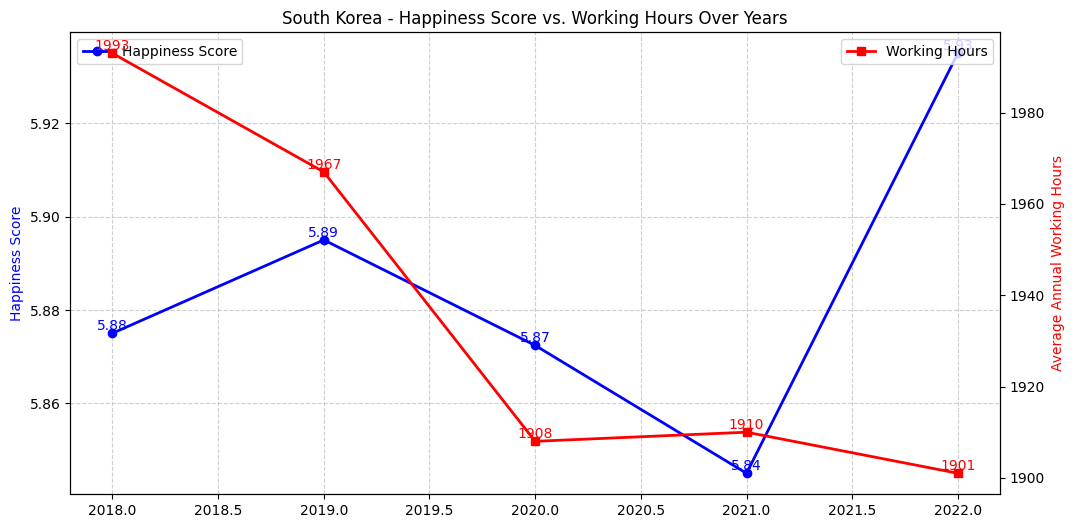

In [ ]:
# 대한민국의 연도별 근무시간 & 행복지수 비교
df_korea = df_working_hours[df_working_hours["country"] == "South Korea"].groupby("year")[["working_hours", "happiness_score"]].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))
# 행복지수 변화 (파란색 선)
ax1.plot(df_korea.index, df_korea["happiness_score"], marker="o", linestyle="-", linewidth=2, color="blue", label="Happiness Score")
ax1.set_ylabel("Happiness Score", color="blue")

# 수치 표시 (행복지수)
for year, score in zip(df_korea.index, df_korea["happiness_score"]):
    ax1.text(year, score, f"{score:.2f}", ha="center", va="bottom", fontsize=10, color="blue")

# 근무시간 변화 (빨간색 선)
ax2 = ax1.twinx()
ax2.plot(df_korea.index, df_korea["working_hours"], marker="s", linestyle="-", linewidth=2, color="red", label="Working Hours")
ax2.set_ylabel("Average Annual Working Hours", color="red")

# 수치 표시 (근무시간)
for year, hours in zip(df_korea.index, df_korea["working_hours"]):
    ax2.text(year, hours, f"{hours:.0f}", ha="center", va="bottom", fontsize=10, color="red")

# 그래프 생성
plt.title("South Korea - Happiness Score vs. Working Hours Over Years")
ax1.grid(True, linestyle="--", alpha=0.6)

# 범례 추가
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 1))

plt.show()

## Output

1.
- 2019~2020 : 근무시간 감소, 행복지수 감소
- 2021 : 근무시간 소폭 상승, 행복지수 최저점
- 2022 : 근무시간 감소, 행복지수 급등 → 단순한 근무 시간 감소이 행복지수에 큰 영향을 끼치지 못하나? 하는 의문

2. 그렇다면
- 한국의 근무 시간이 줄었음에도 행복 지수가 낮았던 이유는? -> 삶의 질을 결정하는 다른 요인이 영향을 미쳤을 가능성
- 2022년에 행복 지수가 갑자기 증가한 이유는? -> 근무 시간이 변하지 않았는데도 행복 지수가 오른 이유를 분석할 필요가 있음

## [근무시간] 4. Top20+한국 근무시간 비교


<ipython-input-59-75ad38aadb72>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




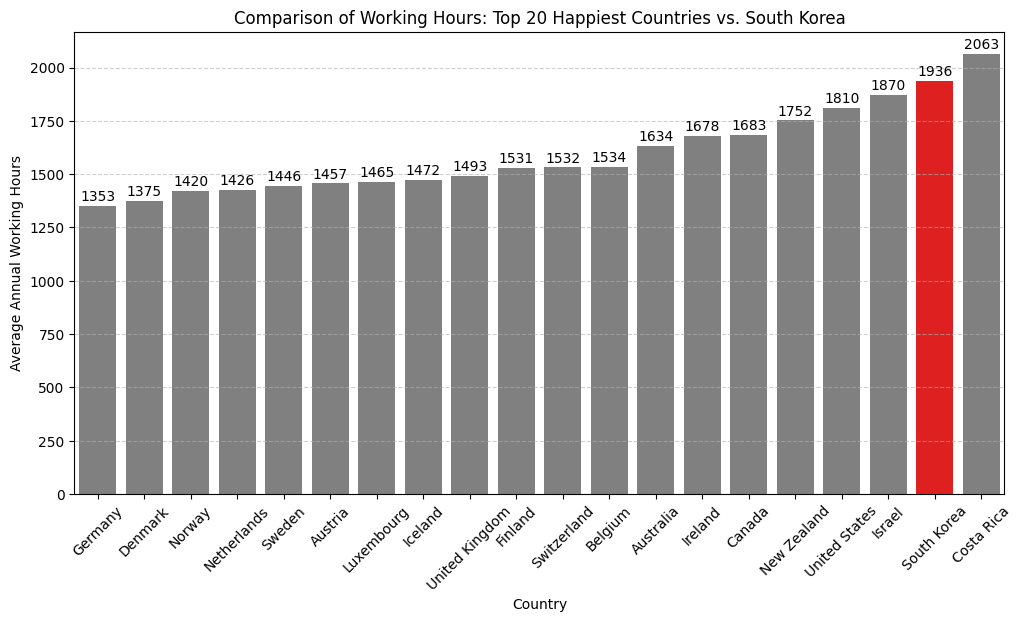

In [ ]:
# 상위 20개국 근무시간 평균 계산
top_20_countries = df_working_hours.groupby("country")["happiness_score"].mean().nlargest(20).index.tolist()
top_20_working_hours = df_working_hours[df_working_hours["country"].isin(top_20_countries)].groupby("country")["working_hours"].mean()
top_20_working_hours = top_20_working_hours.dropna().sort_values()

# 대한민국 근무시간 평균 계산
korea_avg_working_hours = df_working_hours[df_working_hours["country"] == "South Korea"]["working_hours"].mean()

# 근무시간 데이터 생성
top_20_working_hours = pd.concat([top_20_working_hours, pd.Series(korea_avg_working_hours, index=["South Korea"])]).sort_values()

# 그래프 생성
colors = ["grey" if country != "South Korea" else "red" for country in top_20_working_hours.index]
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_20_working_hours.index, y=top_20_working_hours.values, palette=colors)

# 수치 표시
for bar, value in zip(bars.patches, top_20_working_hours.values):
    bars.annotate(f"{value:.0f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() + 10),
                  ha="center", va="bottom", fontsize=10, color="black")

plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Average Annual Working Hours")
plt.title("Comparison of Working Hours: Top 20 Happiest Countries vs. South Korea")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Output
- 한국은 상위 행복 국가들보다 연간 400~600시간 더 많이 근무
- 그렇다면, 한국과 근무시간이 근사치에 있는 나라들을 보고싶다 -> 또 다시 **이스라엘, 코스타리카**

+) 추가적으로 <br>
근무 시간이 짧은 국가들은 어떻게 높은 생산성을 유지하는가?
- 덴마크, 네덜란드, 독일과 같은 국가들의 근무 방식(주 4일제, 유연 근무제, 복지 정책)이 한국에도 적용될 수 있는가?


## [근무시간] 5. Top20+한국 행복지수 ~ 근무시간 산점도


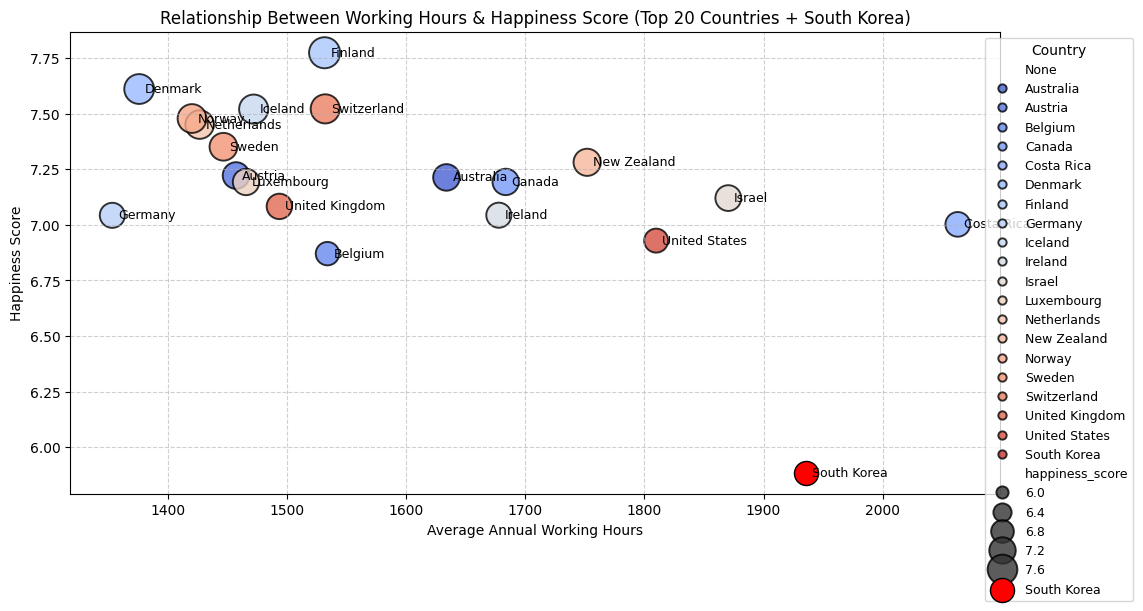

In [ ]:
# 상위 20개국의 평균 행복지수 다시 계산
top_20_happiness = df_working_hours.groupby("country")["happiness_score"].mean().nlargest(20)

# 중복 국가 확인 및 제거
top_20_working_hours = top_20_working_hours[~top_20_working_hours.index.duplicated(keep="first")]
top_20_happiness = top_20_happiness[~top_20_happiness.index.duplicated(keep="first")]

# 대한민국의 평균 행복지수 추가
korea_avg_happiness = df_working_hours[df_working_hours["country"] == "South Korea"]["happiness_score"].mean()

# 대한민국 데이터를 추가하여 다시 병합
df_top20_working_happiness.loc["South Korea"] = [korea_avg_working_hours, korea_avg_happiness]

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_top20_working_happiness["working_hours"], y=df_top20_working_happiness["happiness_score"],
                hue=df_top20_working_happiness.index, palette="coolwarm", size=df_top20_working_happiness["happiness_score"],
                sizes=(50, 500), edgecolor="black", alpha=0.8)

# 한국 강조 (빨간색)
korea_x = df_top20_working_happiness.loc["South Korea", "working_hours"]
korea_y = df_top20_working_happiness.loc["South Korea", "happiness_score"]
plt.scatter(korea_x, korea_y, color="red", s=300, edgecolors="black", label="South Korea", marker="o")

# 라벨 표시
for country in df_top20_working_happiness.index:
    x = df_top20_working_happiness.loc[country, "working_hours"]
    y = df_top20_working_happiness.loc[country, "happiness_score"]
    plt.text(x + 5, y, country, fontsize=9, ha="left", va="center")

plt.xlabel("Average Annual Working Hours")
plt.ylabel("Happiness Score")
plt.title("Relationship Between Working Hours & Happiness Score (Top 20 Countries + South Korea)")
plt.legend(loc="upper right", fontsize=9, title="Country", bbox_to_anchor=(1.15, 1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Output
1.
- 이스라엘 - 한국 - 코스타리카 순으로 근무시간이 많고
- 연간 1900~2000 시간을 근무한다.

2. 하지만 근무시간이 비슷한데 왜 행복지수가 다를까? -> 이 원인을 찾고자 OECD 데이터를 더 살펴봄!

## [지원네트워크] 1. 외부데이터 추가
- 근무시간도 생각보다 영향을 끼치지 않는다면, 어떤 요인이 필요할까?
- 한국은 사회적 유대감이 낮다고 판단해 이와 관련된 수치가 행복지수에 영향을 끼칠것이라고 판단!

##  ​OECD 지원 네트워크의 질(Quality of Support Network)
- 개인이 어려운 상황에 처했을 때 도움을 받을 수 있는 사회적 관계망의 질적 수준을 평가하는 지표
- 이는 개인이 신뢰할 수 있는 친구, 가족, 이웃 등으로 구성된 사회적 지원망의 존재 여부와 그들의 지원 가능성을 반영
- 이러한 사회적 지원망은 개인의 삶의 질과 행복에 긍정적인 영향을 미치며, 사회적 결속력과 공동체 의식을 강화하는 데 기여

https://data-explorer.oecd.org/vis?lc=en&pg=0&snb=1&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HW%40DF_AVG_ANN_HRS_WKD&df[ag]=OECD.ELS.SAE&df[vs]=&pd=2018%2C2022&dq=........_T....&to[TIME_PERIOD]=false


In [ ]:
import pandas as pd

# 파일 경로 설정
happiness_file = "/content/drive/MyDrive/LikeLion/Mid-Project/WHR_2018_2022.csv"
support_network_file = "/content/drive/MyDrive/LikeLion/Mid-Project/OECD_Quality_of_Support_Network.csv"

# 데이터 불러오기
df_happiness = pd.read_csv(happiness_file)
df_support = pd.read_csv(support_network_file)

# 데이터 구조 확인
df_support.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,EST,Estonia,SC_SNTWS,Quality of support network,L,Value,...,95,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,GRC,Greece,SC_SNTWS,Quality of support network,L,Value,...,78,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DEU,Germany,SC_SNTWS,Quality of support network,L,Value,...,90,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,FRA,France,SC_SNTWS,Quality of support network,L,Value,...,94,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,FIN,Finland,SC_SNTWS,Quality of support network,L,Value,...,96,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN


In [ ]:
# 필요한 컬럼만 선택 & 컬럼명 변경
oecd_network_cleaned = oecd_working_hours[["Reference area", "OBS_VALUE"]].copy()
oecd_network_cleaned.columns = ["country", "support_network"]

# 기존 데이터에서 5년 평균 계산 (국가별 평균)
df_avg = df.groupby("country").mean(numeric_only=True).reset_index()

# 5년 평균 데이터와 지원 네트워크 데이터 병합 (국가 기준)
df_network = df_avg.merge(oecd_network_cleaned, on="country", how="left")
df_network

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,support_network
0,Afghanistan,2.86578,0.422141,0.282087,0.259410,0.017000,0.139047,0.015445,2020.0,NaN
1,Albania,4.90074,1.043331,0.734097,0.775066,0.453189,0.160806,0.027272,2020.0,NaN
2,Algeria,5.10402,1.046771,1.038401,0.682484,0.102389,0.099383,0.129638,2020.0,NaN
3,Argentina,6.06894,1.189493,1.270909,0.756555,0.532168,0.069620,0.063283,2020.0,NaN
4,Armenia,4.84776,0.980852,0.931515,0.701971,0.403815,0.082445,0.120924,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...
318,Venezuela,4.87664,0.715648,1.221909,0.676205,0.225143,0.102036,0.063325,2020.0,NaN
319,Vietnam,5.30550,0.848618,1.153815,0.719827,0.639567,0.145498,0.087570,2020.0,NaN
320,Yemen,3.62348,0.428340,1.057495,0.375400,0.245744,0.093538,0.083070,2020.0,NaN
321,Zambia,4.01528,0.626967,0.826007,0.324319,0.487464,0.229724,0.082541,2020.0,NaN


In [ ]:
# 5개년의 행복지수 평균값 계산
df_happiness_avg = df_happiness.groupby("country").mean(numeric_only=True).reset_index()

# 네트워크 데이터 필터링
df_support_cleaned = df_support[["Country", "OBS_VALUE"]].copy()
df_support_cleaned.columns = ["country", "support_network"]

df_happiness_avg["country"] = df_happiness_avg["country"].str.strip().str.lower()
df_support_cleaned["country"] = df_support_cleaned["country"].str.strip().str.lower()

# 데이터 병합
df_merged = df_happiness_avg.merge(df_support_cleaned, on="country", how="left")
df_merged

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,support_network
0,afghanistan,2.86578,0.422141,0.282087,0.259410,0.017000,0.139047,0.015445,2020.0,NaN
1,albania,4.90074,1.043331,0.734097,0.775066,0.453189,0.160806,0.027272,2020.0,NaN
2,algeria,5.10402,1.046771,1.038401,0.682484,0.102389,0.099383,0.129638,2020.0,NaN
3,argentina,6.06894,1.189493,1.270909,0.756555,0.532168,0.069620,0.063283,2020.0,NaN
4,armenia,4.84776,0.980852,0.931515,0.701971,0.403815,0.082445,0.120924,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...
152,venezuela,4.87664,0.715648,1.221909,0.676205,0.225143,0.102036,0.063325,2020.0,NaN
153,vietnam,5.30550,0.848618,1.153815,0.719827,0.639567,0.145498,0.087570,2020.0,NaN
154,yemen,3.62348,0.428340,1.057495,0.375400,0.245744,0.093538,0.083070,2020.0,NaN
155,zambia,4.01528,0.626967,0.826007,0.324319,0.487464,0.229724,0.082541,2020.0,NaN


## [지원네트워크] 2. 상관행렬


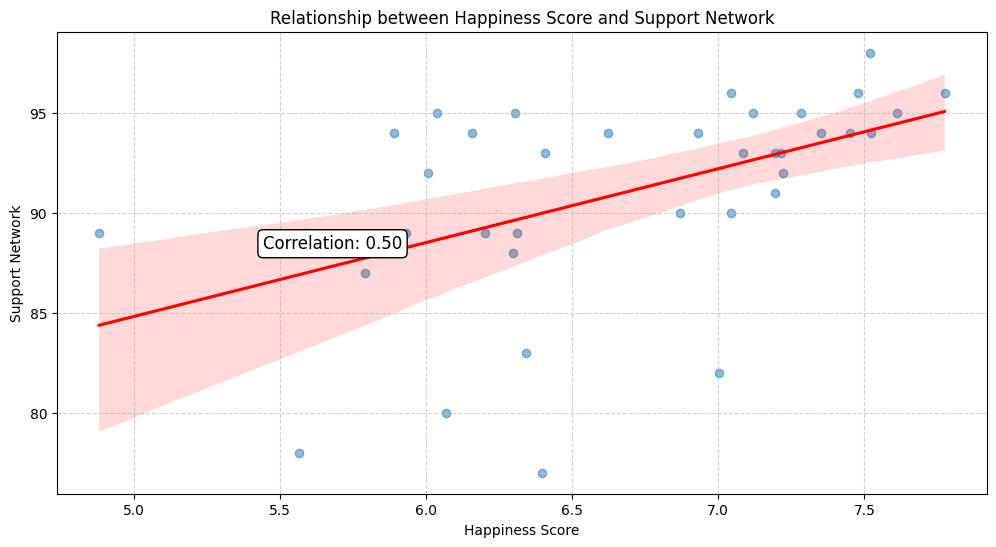

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
happiness_file = "/content/drive/MyDrive/LikeLion/Mid-Project/WHR_2018_2022.csv"
support_network_file = "/content/drive/MyDrive/LikeLion/Mid-Project/OECD_support_network.csv"

# 데이터 불러오기
df_happiness = pd.read_csv(happiness_file)
df_support = pd.read_csv(support_network_file)

# 필요한 컬럼만 선택 및 컬럼명 변경 (지원 네트워크 데이터)
df_support_cleaned = df_support[["Country", "OBS_VALUE"]].copy()
df_support_cleaned.columns = ["country", "support_network"]

# 행복 데이터와 데이터 병합
df_happiness_avg = df_happiness.groupby("country").mean(numeric_only=True).reset_index()

df_happiness_avg["country"] = df_happiness_avg["country"].str.strip().str.lower()
df_support_cleaned["country"] = df_support_cleaned["country"].str.strip().str.lower()
df_merged = df_happiness_avg.merge(df_support_cleaned, on="country", how="left")

# 행복지수와 지원 네트워크의 상관계수 계산을 위해 결측값 제거
df_filtered = df_merged[["happiness_score", "support_network"]].dropna()

# 상관계수 계산
correlation_value = df_filtered.corr().iloc[0, 1]

# 행복지수 vs 지원 네트워크 관계
plt.figure(figsize=(12, 6))
sns.regplot(x=df_filtered["happiness_score"], y=df_filtered["support_network"],
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Happiness Score")
plt.ylabel("Support Network")
plt.title("Relationship between Happiness Score and Support Network")

# 수치 표시
plt.text(x=df_filtered["happiness_score"].max() * 0.7,
         y=df_filtered["support_network"].max() * 0.9,
         s=f"Correlation: {correlation_value:.2f}",
         fontsize=12, color="black",
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Output

- 근무시간과 행복지수는 양의 상관관계(+0.50) 를 보임 → 지원 네트워크의 질이 상승하면 행복 지수도 상승한다.
- 행복 지수를 높이려면 사회적 지원 시스템을 강화라는 제안을 할 수 있다.

## [지원 네트워크] 3. Top20+한국 행복지수 ~ 근무시간 산점도


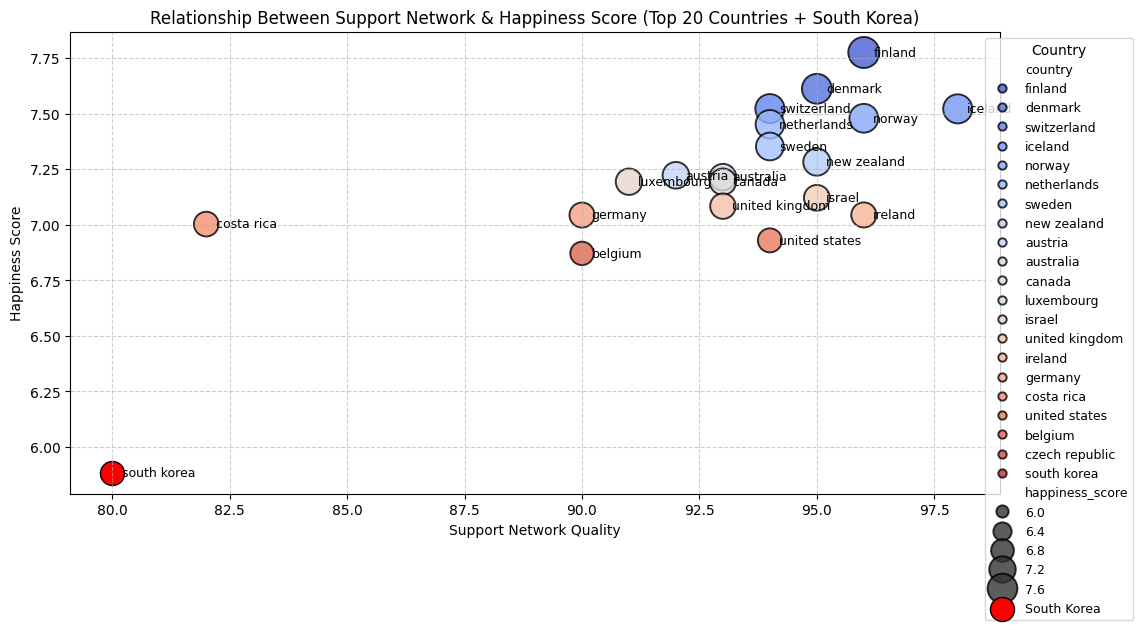

In [ ]:
# 데이터 불러오기
top_20_happiness = df_merged.nlargest(20, "happiness_score")
korea_data = df_merged[df_merged["country"] == "south korea"]
df_top20 = pd.concat([top_20_happiness, korea_data])

# 산점도 생성
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df_top20["support_network"],
    y=df_top20["happiness_score"],
    hue=df_top20["country"],
    palette="coolwarm",
    size=df_top20["happiness_score"],
    sizes=(50, 500),
    edgecolor="black",
    alpha=0.8
)

# 한국 강조
if not korea_data.empty:
    plt.scatter(
        korea_data["support_network"].values[0],
        korea_data["happiness_score"].values[0],
        color="red", s=300, edgecolors="black", label="South Korea", marker="o"
    )

# 라벨 추가
for _, row in df_top20.iterrows():
    plt.text(row["support_network"] + 0.2, row["happiness_score"], row["country"], fontsize=9, ha="left", va="center")

plt.xlabel("Support Network Quality")
plt.ylabel("Happiness Score")
plt.title("Relationship Between Support Network & Happiness Score (Top 20 Countries + South Korea)")
plt.legend(loc="upper right", fontsize=9, title="Country", bbox_to_anchor=(1.15, 1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Output

- 앞서 주목했던 이스라엘과 코스타리카 : 한국보다 높은 관계망을 보인다.
- 한국에서는 상대적으로 정서적 지원이 부족함 -> 행복에 부정적인 영향


## 결론

- 한국은 이미 GDP가 높은 상태 -> 행복지수에 큰 영향을 미치지 않음.
- 한국의 행복지수에 큰 영향을 끼치는 요인 -> <br>
사회적, 정서적 고립  / 높은 근무시간으로 인해 사회적 관계 단절
- 이러한 분석을 바탕으로
  -  워라밸 정책 강화 : 유연근무제 확대 등, 개인이 가족,친구와 시간을 보낼 여건 조성
  - 정신 건강에 대한 지원 체계를 확대 : 정신 건강 치료에 대한 접근성을 높여야 한다.